Name : Chathumini B.G.D.T.

Index Number : 190107T

Assignment 1

Question 1

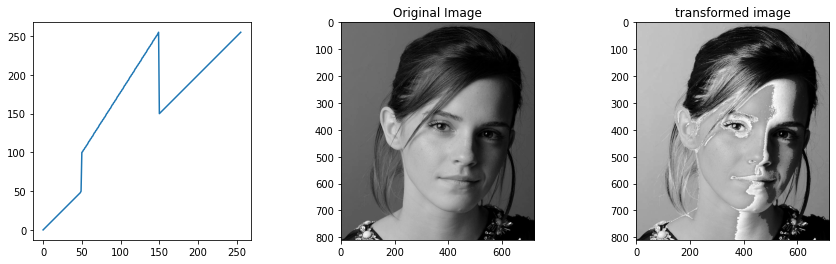

In [31]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

emma =  cv.imread("emma_gray.jpg",cv.IMREAD_GRAYSCALE)
assert emma is not None

# linearly spaced values
t1=np.linspace(0,50,50) 
t2=np.linspace(50,100,0) 
t3=np.linspace(100,255,100) 
t4=np.linspace(255,150,0) 
t5=np.linspace(150,255,106) 

transform = np.concatenate((t1,t2,t3,t4,t5), axis = 0).astype(np.uint8)  #connect all 3 transformations 
assert len(transform) == 256
emma_transformed= cv.LUT(emma,transform)

fig, axis = plt.subplots(1,3)
fig.set_figwidth(15)
axis[0].plot(transform)
axis[0].set_aspect('equal')
axis[1].imshow(emma, cmap='gray', vmin=0, vmax=255)
axis[1].set_title("Original Image")
axis[2].imshow(emma_transformed, cmap='gray', vmin=0, vmax=255)
axis[2].set_title("transformed image")
plt.show()

Question 2

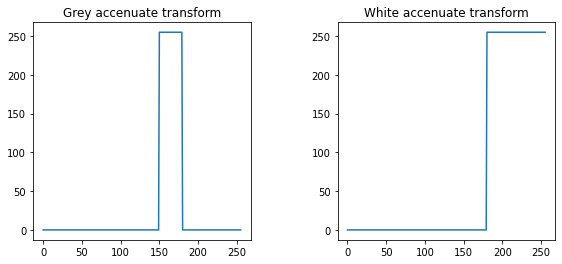

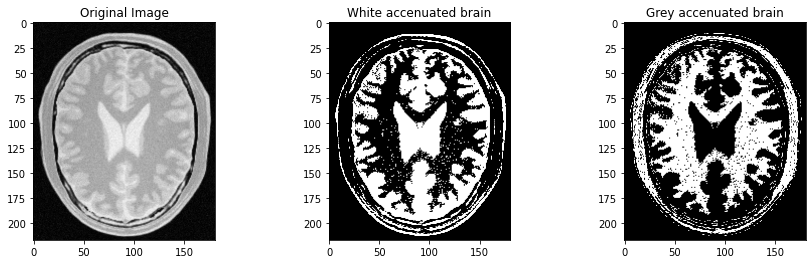

In [32]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

brain =  cv.imread("brain_proton_density_slice.png",cv.IMREAD_GRAYSCALE)
assert brain is not None

# accenuate white
p1=np.linspace(0,0,180) 
p2=np.linspace(0,255,0)
p3=np.linspace(255,255,76) 

# accenuate Grey 
t1=np.linspace(0,0,150) 
t2=np.linspace(0,255,0)
t3=np.linspace(255,255,30) 
t4=np.linspace(255,0,0) 
t5=np.linspace(0,0,76) 

accenuate_white = np.concatenate((p1,p2,p3), axis = 0).astype(np.uint8)  #connect all 3 transformations 
assert len(accenuate_white) == 256
accenuate_grey = np.concatenate((t1,t2,t3,t4,t5), axis = 0).astype(np.uint8)  #connect all 3 transformations 
assert len(accenuate_grey) == 256

fig1, ax = plt.subplots(1,2)
fig1.set_figwidth(10)
ax[0].plot(accenuate_grey)
ax[0].set_title("Grey accenuate transform")
ax[0].set_aspect('equal')
ax[1].plot(accenuate_white)
ax[1].set_title("White accenuate transform")
ax[1].set_aspect('equal')

white_accenuated_brain = cv.LUT(brain,accenuate_white)
grey_accenuated_brain = cv.LUT(brain,accenuate_grey)

fig2, axis = plt.subplots(1,3)
fig2.set_figwidth(15)
axis[0].imshow(brain, cmap='gray', vmin=0, vmax=255)
axis[0].set_title("Original Image")
axis[1].imshow(white_accenuated_brain, cmap='gray', vmin=0, vmax=255)
axis[1].set_title("White accenuated brain")
axis[2].imshow(grey_accenuated_brain, cmap='gray', vmin=0, vmax=255)
axis[2].set_title("Grey accenuated brain")
plt.show()

Question 3

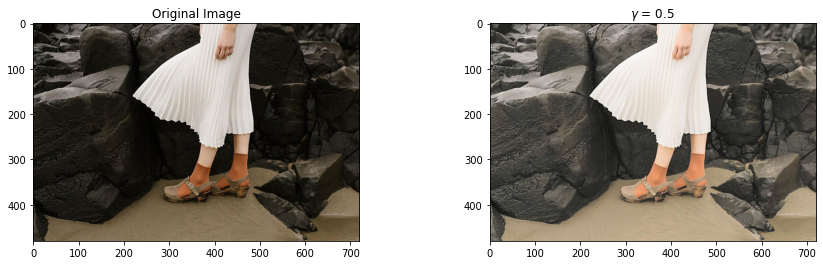

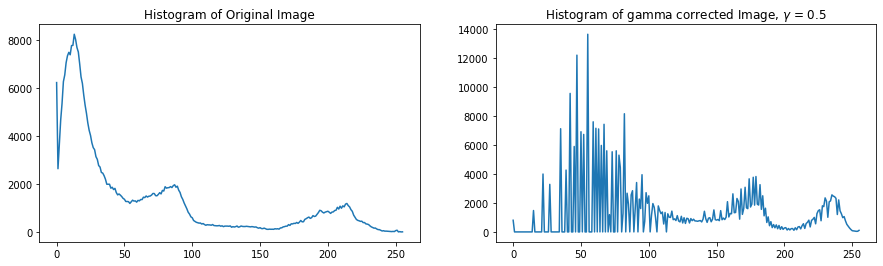

In [33]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

im =  cv.imread("highlights_and_shadows.jpg")
assert im is not None

im_lab = cv.cvtColor(im, cv.COLOR_BGR2Lab)
(l,a,b)= cv.split(im_lab)

gamma = 0.5
g_transform = np.array([(p/255)**gamma*255 for p in range(0,256)]).astype(np.uint8)
g_transformed = cv.LUT(l, g_transform)
im_lab[:,:,0]=g_transformed 

im_hist = cv.calcHist([im],[0],None,[256],[0,256])
im_lab_hist = cv.calcHist([im_lab],[0],None,[256],[0,256])

fig, ax = plt.subplots(1,2)
fig.set_figwidth(15)
ax[0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[0].set_title("Original Image")
ax[1].imshow(cv.cvtColor(im_lab, cv.COLOR_Lab2RGB))
ax[1].set_title("$\gamma$ = "+ str(gamma))

fig2, axis = plt.subplots(1,2)
fig2.set_figwidth(15)
axis[0].plot(im_hist)
axis[0].set_title("Histogram of Original Image")
axis[1].plot(im_lab_hist)
axis[1].set_title("Histogram of gamma corrected Image, $\gamma$ = "+ str(gamma))
plt.show()


Question 4

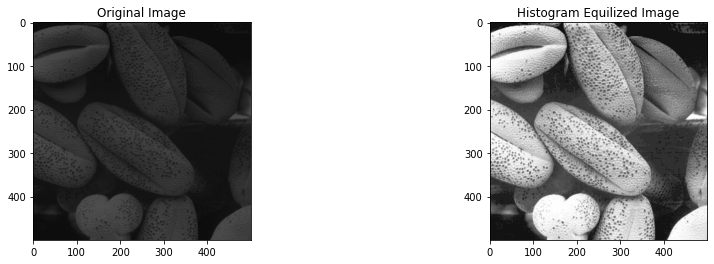

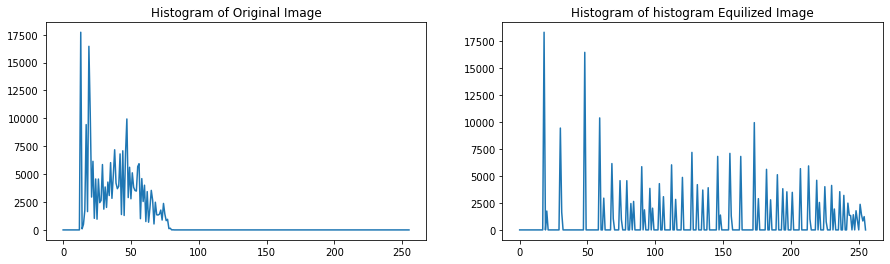

In [6]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

shells =  cv.imread("shells.png",cv.IMREAD_GRAYSCALE)
assert shells is not None

shells_hist = cv.calcHist([shells],[0],None,[256],[0,256])

#normalize
n_pixels = np.sum(shells_hist)
shells_histo = shells_hist/n_pixels

#normalized cumulative histogram
cdf_hist = np.cumsum(shells_histo)

transform = np.floor(255 * cdf_hist).astype(np.uint8)

eq_shells = cv.LUT(shells,transform)
equi_shells_histo = cv.calcHist([eq_shells ],[0],None,[256],[0,256])

fig, ax = plt.subplots(1,2)
fig.set_figwidth(15)
ax[0].imshow(shells , cmap='gray', vmin=0, vmax=255)
ax[0].set_title("Original Image")
ax[1].imshow(eq_shells , cmap='gray', vmin=0, vmax=255)
ax[1].set_title("Histogram Equilized Image")

fig2, axis = plt.subplots(1,2)
fig2.set_figwidth(15)
axis[0].plot(shells_hist)
axis[0].set_title("Histogram of Original Image")
axis[1].plot(equi_shells_histo)
axis[1].set_title("Histogram of histogram Equilized Image")
plt.show()


Question 5

In [10]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import math

def zoom_im(image, method, scaling_fact):
    rows, cols = int(scaling_fact* image.shape[0]), int(scaling_fact* image.shape[1])
    zoomed_img = np.zeros((rows,cols,3),dtype=image.dtype)
    if (method == 0):
        #nearest-neighbor method
        for r in range(rows):
            for c in range(cols):
                im_r, im_c= int(np.round(r/scaling_fact)), int(np.round(c/scaling_fact))
                if im_r >= image.shape[0]:
                    im_r -=1
                if im_c >= image.shape[1]:
                    im_c -=1
                zoomed_img[r,c]= image[im_r,im_c]
        return zoomed_img
    else:
        #bilinear interpolation method
        for r in range(rows-2):
            for c in range(cols-2):
                im_r, im_c= r/scaling_fact, c/scaling_fact
                left_bottom = [math.floor(im_r), math.floor(im_c)]
                right_bottom = [math.floor(im_r), math.ceil(im_c)]
                left_top = [math.ceil(im_r), math.floor(im_c)]
                right_top = [math.ceil(im_r),math.ceil(im_c)]

                if left_top[0]>image.shape[0]:
                    left_top[0] -=1
                    right_top[0] -=1
                if right_bottom[1]> image.shape[1]:
                    right_bottom[1] -=1
                    right_top[1] -=1
                
                ratio_vertical = [im_r-left_bottom[0],left_top[0]- im_r]
                ratio_horizontal = [im_c-left_bottom[1],right_top[1]- im_c]

                horizontal_1 =ratio_vertical[0]*image[left_top[0],left_top[1]] +ratio_vertical[1]*image[left_bottom[0],left_bottom[1]]
                horizontal_2 =ratio_vertical[0]*image[right_top[0],right_top[1]] +ratio_vertical[1]*image[right_bottom[0],right_bottom[1]]
                zoomed_img[r,c]= np.rint(horizontal_1*ratio_horizontal[1] + horizontal_2*ratio_horizontal[0])
        return zoomed_img



#original images
org_img_1 =  cv.imread("im01.png")
assert org_img_1 is not None
org_img_2 =  cv.imread("im02.png")
assert org_img_2 is not None
org_img_3 =  cv.imread("im03.png")
assert org_img_3 is not None

#small images
sm_img_1 =  cv.imread("im01small.png")
assert sm_img_1 is not None
sm_img_2 =  cv.imread("im02small.png")
assert sm_img_2 is not None
sm_img_3 =  cv.imread("im03small.png")
assert sm_img_3 is not None

#Zoom by nearest-neighbor method
nn_1 = zoom_im(sm_img_1, 0, 4)
nn_2 = zoom_im(sm_img_2, 0, 4)
nn_3 = zoom_im(sm_img_3, 0, 4)

#Zoom by bilinear interpolation method
bi_1 = zoom_im(sm_img_1, 1, 4)
bi_2 = zoom_im(sm_img_2, 1, 4)
bi_3 = zoom_im(sm_img_3, 1, 4)

fig, ax = plt.subplots(3,2,figsize =(20,20))
fig.suptitle("Zoomed by nearest-neighbor method")
ax[0][0].imshow(cv.cvtColor(org_img_1, cv.COLOR_BGR2RGB))
ax[0][0].set_title("Original Image 1")
ax[0][1].imshow(cv.cvtColor(nn_1, cv.COLOR_BGR2RGB))
ax[0][1].set_title("Zoomed Image 1")

ax[1][0].imshow(cv.cvtColor(org_img_2, cv.COLOR_BGR2RGB))
ax[1][0].set_title("Original Image 2")
ax[1][1].imshow(cv.cvtColor(nn_2, cv.COLOR_BGR2RGB))
ax[1][1].set_title("Zoomed Image 2")

ax[2][0].imshow(cv.cvtColor(org_img_3, cv.COLOR_BGR2RGB))
ax[2][0].set_title("Original Image 3")
ax[2][1].imshow(cv.cvtColor(nn_3, cv.COLOR_BGR2RGB))
ax[2][1].set_title("Zoomed Image 3")
plt.show()



IndexError: index 480 is out of bounds for axis 1 with size 480

In [ ]:
fig, ax = plt.subplots(3,2,figsize =(20,20))
fig.suptitle("Zoomed by bilinear interpolation method")
ax[0][0].imshow(cv.cvtColor(org_img_1, cv.COLOR_BGR2RGB))
ax[0][0].set_title("Original Image 1")
ax[0][1].imshow(cv.cvtColor(bi_1, cv.COLOR_BGR2RGB))
ax[0][1].set_title("Zoomed Image 1")

ax[1][0].imshow(cv.cvtColor(org_img_2, cv.COLOR_BGR2RGB))
ax[1][0].set_title("Original Image 2")
ax[1][1].imshow(cv.cvtColor(bi_2, cv.COLOR_BGR2RGB))
ax[1][1].set_title("Zoomed Image 2")

ax[2][0].imshow(cv.cvtColor(org_img_3, cv.COLOR_BGR2RGB))
ax[2][0].set_title("Original Image 3")
ax[2][1].imshow(cv.cvtColor(bi_3, cv.COLOR_BGR2RGB))
ax[2][1].set_title("Zoomed Image 3")
plt.show()

Question 6

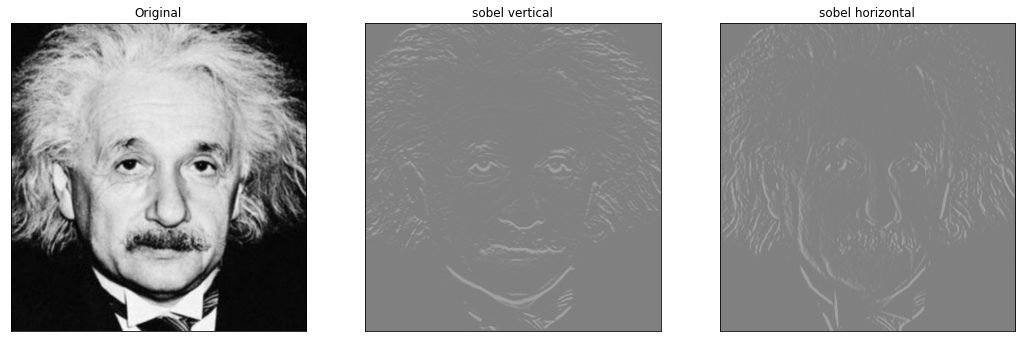

In [9]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from scipy import stats

einstein = cv.imread("einstein.png",cv.IMREAD_GRAYSCALE)
assert einstein is not None

sobel_v = np.array([(-1,-2,-1),(0,0,0),(1,2,1)],dtype=np.float32)
einstein_x = cv.filter2D(einstein,-1,sobel_v)
sobel_h = np.array([(-1,0,1),(-2,0,2),(-1,0,1)],dtype=np.float32)
einstein_y = cv.filter2D(einstein,-1,sobel_h)

fig, ax =plt.subplots(1,3, sharex ='all', sharey ='all', figsize=(18,18))

ax[0].imshow(einstein,cmap='gray',vmin=0, vmax=255)
ax[0].set_title("Original")
ax[0].set_xticks([]),ax[0].set_yticks([])

ax[1].imshow(einstein_x,cmap='gray', vmin=-1020, vmax=1020)
ax[1].set_title("sobel vertical")
ax[1].set_xticks([]),ax[1].set_yticks([])

ax[2].imshow(einstein_y ,cmap='gray',  vmin=-1020, vmax=1020)
ax[2].set_title("sobel horizontal")
ax[2].set_xticks([]),ax[2].set_yticks([])
plt.show()

In [24]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from scipy import stats

einstein = cv.imread("einstein.png",cv.IMREAD_GRAYSCALE)
assert einstein is not None

[r,c]= einstein.shape
einstein_v = np.zeros((r,c),dtype=np.float32)
einstein_h = einstein_v.copy
padded_array = np.zeros((r+2,c+2),dtype=np.float32)
padded_array[1:r+1,1:c+1] = einstein 

for row in range(r):
    for col in range(c):
        einstein_v[row,col] = (-1*padded_array[row,col] -2*padded_array[row,col+1] -1*padded_array[row,col+2] +padded_array[row+2,col] +2*padded_array[row+2,col+1] +padded_array[row+2,col+2]).astype(np.float32)
        einstein_h[row,col] = (-1*padded_array[row,col] + padded_array[row,col+2] -2*padded_array[row+1,col] +2*padded_array[row+1,col+2]-1*padded_array[row+2,col] + padded_array[row+2,col+2]).astype(np.float32)

fig, ax =plt.subplots(1,3, sharex ='all', sharey ='all', figsize=(18,18))

ax[0].imshow(einstein,cmap='gray',vmin=0, vmax=255)
ax[0].set_title("Original")
ax[0].set_xticks([]),ax[0].set_yticks([])

ax[1].imshow(einstein_v,cmap='gray', vmin=-1020, vmax=1020)
ax[1].set_title("sobel vertical")
ax[1].set_xticks([]),ax[1].set_yticks([])

ax[2].imshow(einstein_h ,cmap='gray',  vmin=-1020, vmax=1020)
ax[2].set_title("sobel horizontal")
ax[2].set_xticks([]),ax[2].set_yticks([])
plt.show()

TypeError: 'builtin_function_or_method' object does not support item assignment

Question 7

In [ ]:
#original images
org_img_1 =  cv.imread("im01.png")
assert org_img_1 is not None
org_img_2 =  cv.imread("im02.png")
assert org_img_2 is not None
org_img_3 =  cv.imread("im03.png")
assert org_img_3 is not None

#small images
sm_img_1 =  cv.imread("im01small.png")
assert sm_img_1 is not None
sm_img_2 =  cv.imread("im02small.png")
assert sm_img_2 is not None
sm_img_3 =  cv.imread("im03small.png")
assert sm_img_3 is not None